In [1]:
import emcee
import corner
import matplotlib.pyplot as plt
from getdist import plots, MCSamples
import getdist
import IPython
import numpy as np

%matplotlib inline

In [2]:
# import h5py

# with h5py.File("mcmc_test.h5", "r") as f:
#     print(list(f.keys()))

Removed no burn in


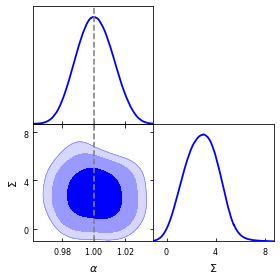

In [3]:
reader = emcee.backends.HDFBackend("/pscratch/sd/s/shreeb/shreeb/BAO_Bispectrum_with_data/nobao_project/all_mcmc_results/new_alpha/glam_parallel_kmax02/mcmc_camb_67773070_matterpower_z0.5_0060.h5",read_only=True)

# truth ={" \u03B1" : 1, "f" : 0.2 ,r"b_1": 1, r"b_2" : 0 , r'\Sigma' : 5, 'S\u2080' :0, 'S\u2081' :10}
# truth = {"\u03B1" : 1, "f" : 0.2 ,r"b_1": 1.5, r"b_2" : -0.5, 'S\u2080' :0, 'S\u2081' : 0}
truth = {"\u03B1" : 1, r'\Sigma' : None}
labels=truth.keys()
samples = MCSamples(samples = reader.get_chain(discard=1400, flat=True, thin=90), names = labels, labels = labels)
# Triangle plot 

g = plots.get_subplot_plotter(analysis_settings={'ignore_rows': 0, 'contours':[0.68, 0.95, 0.99]});
g.settings.figure_legend_frame = False
g.settings.alpha_filled_add=0.4
g.settings.title_limit_fontsize = 20
g.settings.num_plot_contours = 3
# g.settings.axes_fontsize = 16
# g.settings.axes_labelsize =16
# g.settings.fig_width_inch = 10
g.settings.linewidth = 200
g.settings.axis_marker_lw = 1.6
g.settings.axis_tick_max_labels = 3
g.settings.tight_layout = True
g.triangle_plot([samples],title_limit=None, filled=True,contour_colors = ['blue','darkblue'],line_args = [{'lw':1.8, 'color':'blue'},
                {'lw':1.8, 'color':'darkblue'}],markers= truth)
# plt.savefig("plots_new/glam_mcmc_z0.5_params2_after_review.png", dpi = 300)
plt.show()


Removed no burn in


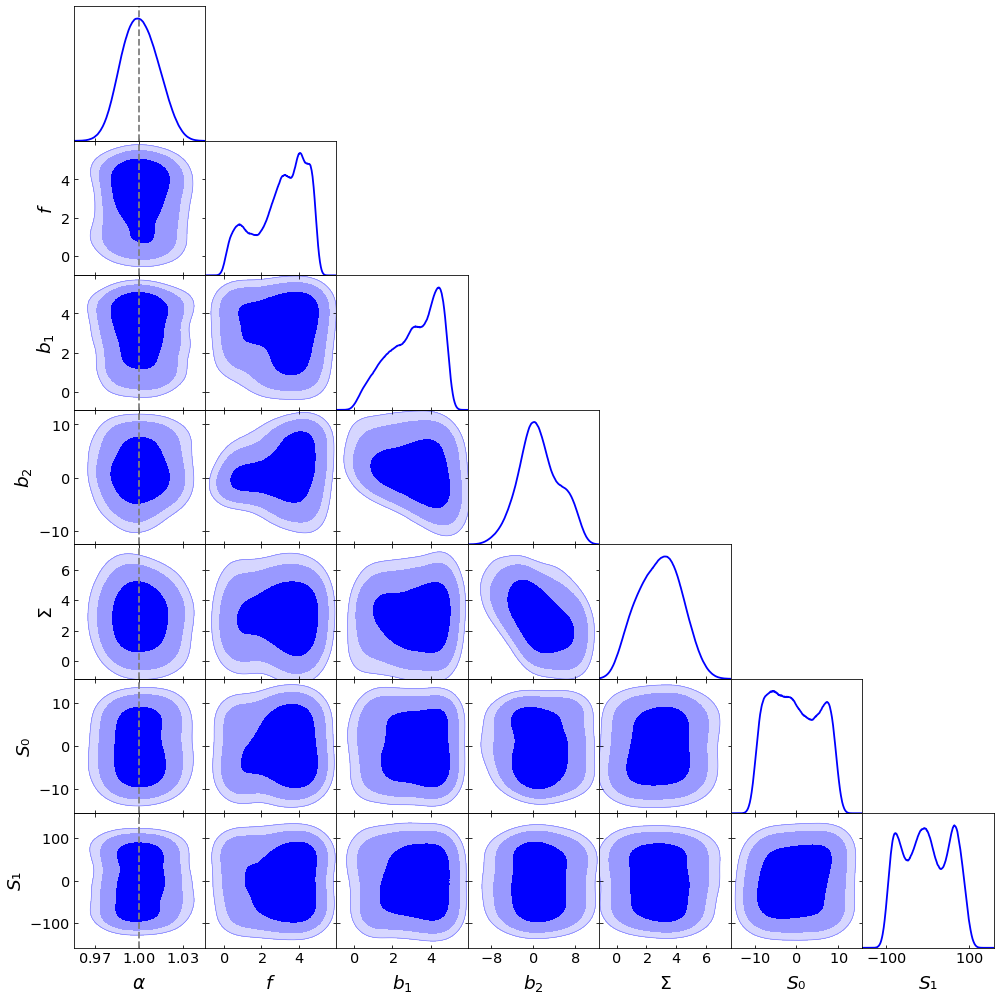

In [69]:
reader = emcee.backends.HDFBackend("/global/homes/s/shreeb/BAO_bispectrum/nobao_project/all_mcmc_results/mcmc_cosmoprimo_k2_camb_67773070_matterpower_z0.5_0060.h5",read_only=True)

truth = {" \u03B1" : 1, "f" : None ,r"b_1": None, r"b_2" : None , r'\Sigma' : None, 'S\u2080' :None, 'S\u2081' :None}
# truth = {"\u03B1" : 1, "f" : 0.2 ,r"b_1": 1.5, r"b_2" : -0.5, 'S\u2080' :0, 'S\u2081' : 0}
# truth = {"\u03B1" : 1, r'\Sigma' : 2.8}
labels=truth.keys()
samples = MCSamples(samples = reader.get_chain(discard=1500, flat=True, thin=60), names = labels, labels = labels)
# Triangle plot
g = plots.get_subplot_plotter(analysis_settings={'ignore_rows': 0, 'contours':[0.68, 0.95, 0.99]});
g.settings.figure_legend_frame = False
g.settings.alpha_filled_add=0.4
g.settings.scaling_factor = 1
g.settings.num_plot_contours = 3
g.settings.axes_fontsize = 16
g.settings.axes_labelsize = 20 #36
# g.settings.fig_width_inch = 10
g.settings.axis_marker_lw = 1.6
# g.settings.axis_tick_x_rotation=90
# g.settings.axis_tick_y_rotation=90
# g.settings.colorbar_tick_rotation=90
# g.settings.axis_tick_max_labels = 3
# g.settings.axis_tick_min_labels = 2
g.settings.tight_layout = True
g.triangle_plot([samples],title_limit=None, filled=True,contour_colors = ['blue','darkblue'],line_args = [{'lw':1.8, 'color':'blue'},
                {'lw':2, 'color':'darkblue'}])
# g.triangle_plot([samples],["\u03B1", r'\Sigma'],title_limit=None, filled=True,contour_colors = ['blue','darkblue'],line_args = [{'lw':1.8, 'color':'blue'},
#                 {'lw':2, 'color':'darkblue'}])
for ax in g.subplots[:,0]:
    ax.axvline(1, color='gray', lw = 1.8, ls='--')
# IPython.display.display(g.fig)
plt.savefig("plots_new/glam_mcmc_z0.5_params7_after_review.png", dpi = 200)
# plt.show()


In [62]:
np.mean(samples[r'\Sigma'])

2.86951600560718

[' α', 'f', 'b_1', 'b_2', '\\Sigma', 'S₀', 'S₁']


/tmp/ipykernel_2304596/710217666.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-k" (-> color='k'). The keyword argument will take precedence.
  ax[i].plot(samples[:, :, i], '-k', alpha=0.3 , color="magenta");


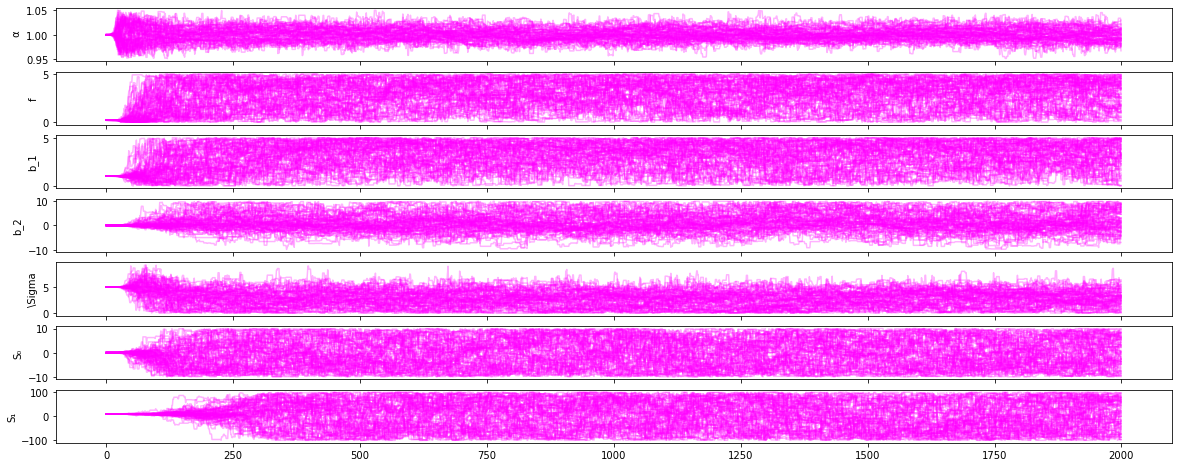

In [43]:
# reader = emcee.backends.HDFBackend("/pscratch/sd/s/shreeb/shreeb/BAO_Bispectrum_with_data/nobao_project/all_mcmc_results/new_alpha/glam_parallel_kmax02_params7/mcmc_camb_65272770_matterpower_z0.5_0000.h5",read_only=True)
samples = reader.get_chain()
ylabels = list(truth.keys())
print(ylabels)
fig, ax = plt.subplots(len(ylabels), figsize=(20, 8), sharex=True)

for i in range(len(ylabels)):
    ax[i].set_ylabel(ylabels[i])
    ax[i].plot(samples[:, :, i], '-k', alpha=0.3 , color="magenta");
# ax[2].set_xlabel('steps')

# samples = reader.get_chain(discard=200, flat=True, thin=5)
# fig = corner.corner(samples, bins=30,smooth=2, labels= ylabels,truths=[1, 0.2, 1.5, -0.5,5],show_titles=True,color = "green")

In [155]:
# Flatten to 1D, get likelihood values
lnprob = reader.get_log_prob(discard = 1000, thin = 80)
lnprob = lnprob.flatten()
# Find index of max likelihood in chain 
max_like_idx = np.argmax(lnprob)

print(max_like_idx, samples.shape, lnprob.shape)

# Get parameter vector at max likelihood
max_params = [samples[:,:,i].flatten()[max_like_idx] for i in range(len(labels))]

# Calculate max log likelihood 
max_lnlike = lnprob[max_like_idx]

print("Maximum likelihood parameters:")
print(max_params) 
print("Maximum log likelihood:")
print(max_lnlike)

269 (2000, 70, 7) (840,)
Maximum likelihood parameters:
[1.0000124845756544, 0.20005074035226816, 0.99999577165803, 8.690902430023159e-05, 5.000011287506559, 4.6185275204302813e-05, 10.000001416601028]
Maximum log likelihood:
-2.7543757798009665


In [10]:
import numpy as np

In [11]:
cov= np.load("/mnt/data1/BispectrumGLAM/glamoli_cov.npz")['arr_0']

In [12]:
np.linalg.inv(cov)

array([[ 1.23518737e-11,  7.36108007e-13,  3.77102198e-12, ...,
         1.65331741e-08,  2.72860614e-09,  6.16932785e-09],
       [ 7.36108007e-13,  6.50712452e-10, -3.02173302e-12, ...,
         7.05506913e-08, -2.15236282e-07,  6.93714062e-08],
       [ 3.77102198e-12, -3.02173302e-12,  1.61793837e-09, ...,
        -1.34817699e-07,  1.75859133e-07,  8.36482863e-08],
       ...,
       [ 1.65331741e-08,  7.05506913e-08, -1.34817699e-07, ...,
         1.45932314e-01, -6.67294214e-03, -9.80809356e-04],
       [ 2.72860614e-09, -2.15236282e-07,  1.75859133e-07, ...,
        -6.67294214e-03,  1.70709570e-01, -4.22538586e-03],
       [ 6.16932785e-09,  6.93714062e-08,  8.36482863e-08, ...,
        -9.80809356e-04, -4.22538586e-03,  4.28676302e-02]])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


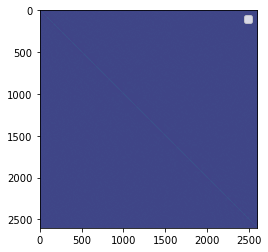

In [13]:
scaled_inv=np.linalg.pinv(cov,rcond=1e-15, hermitian=True)
plt.imshow(np.corrcoef(scaled_inv))
plt.legend()

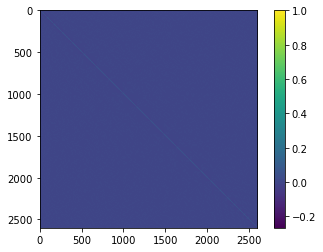

In [14]:
plt.imshow(np.corrcoef(np.linalg.inv(cov)))
plt.colorbar()

In [13]:
import asdf

In [14]:
path = "/global/cfs/cdirs/desi/public/cosmosim/AbacusSummit/ic/AbacusSummit_fixedbase_c000_ph099/"

In [16]:
af = asdf.open(path+"ic_dens_N576.asdf", lazy_load = False)
dens = af["data"]["density"]

ValueError: Supported compression types are: ['zlib', 'bzp2', 'lz4', 'input'], not 'blsc'

In [1]:
import pyasdf

/global/homes/s/shreeb/anaconda3/lib/python3.9/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 4.0.0-unsupported is an invalid version and will not be supported in a future release
  warnings.warn(


In [12]:
af = pyasdf.ASDFDataSet(path+'ic_dens_N576.asdf',('gzip', 0))
dens = af["data"]["density"]

PermissionError: [Errno 13] Unable to open file (unable to open file: name = '/global/cfs/cdirs/desi/public/cosmosim/AbacusSummit/ic/AbacusSummit_fixedbase_c000_ph099/ic_dens_N576.asdf', errno = 13, error message = 'Permission denied', flags = 1, o_flags = 2)

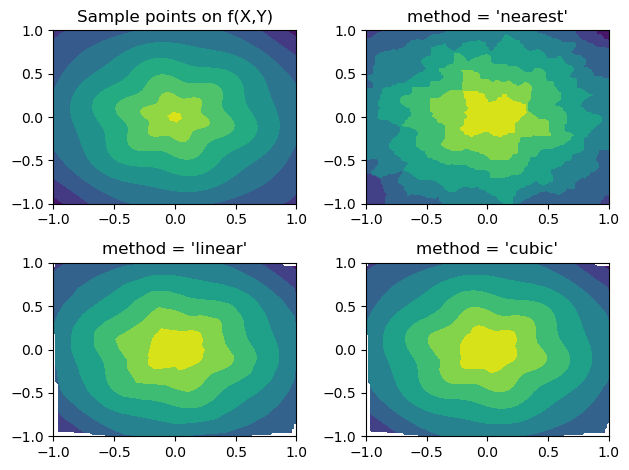

In [5]:
import numpy as np
from scipy.interpolate import griddata
import matplotlib.pyplot as plt

x = np.linspace(-1,1,100)
y =  np.linspace(-1,1,100)
X, Y = np.meshgrid(x,y)

def f(x, y):
    s = np.hypot(x, y)
    phi = np.arctan2(y, x)
    tau = s + s*(1-s)/5 * np.sin(6*phi) 
    return 5*(1-tau) + tau

T = f(X, Y)
# Choose npts random point from the discrete domain of our model function
npts = 400
px, py = np.random.choice(x, npts), np.random.choice(y, npts)

fig, ax = plt.subplots(nrows=2, ncols=2)
# Plot the model function and the randomly selected sample points
ax[0,0].contourf(X, Y, T)
# ax[0,0].scatter(px, py, c='k', alpha=0.2, marker='.')
ax[0,0].set_title('Sample points on f(X,Y)')

# Interpolate using three different methods and plot
for i, method in enumerate(('nearest', 'linear', 'cubic')):
    Ti = griddata((px, py), f(px,py), (X, Y), method=method)
    r, c = (i+1) // 2, (i+1) % 2
    ax[r,c].contourf(X, Y, Ti)
    ax[r,c].set_title("method = '{}'".format(method))

plt.tight_layout()
plt.show()
